Loading the Libraries and data

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [43]:
diabetes_data = pd.read_csv('./diabetes.csv')

In [44]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
diabetes_data.shape

(768, 9)

Visualizing the data 

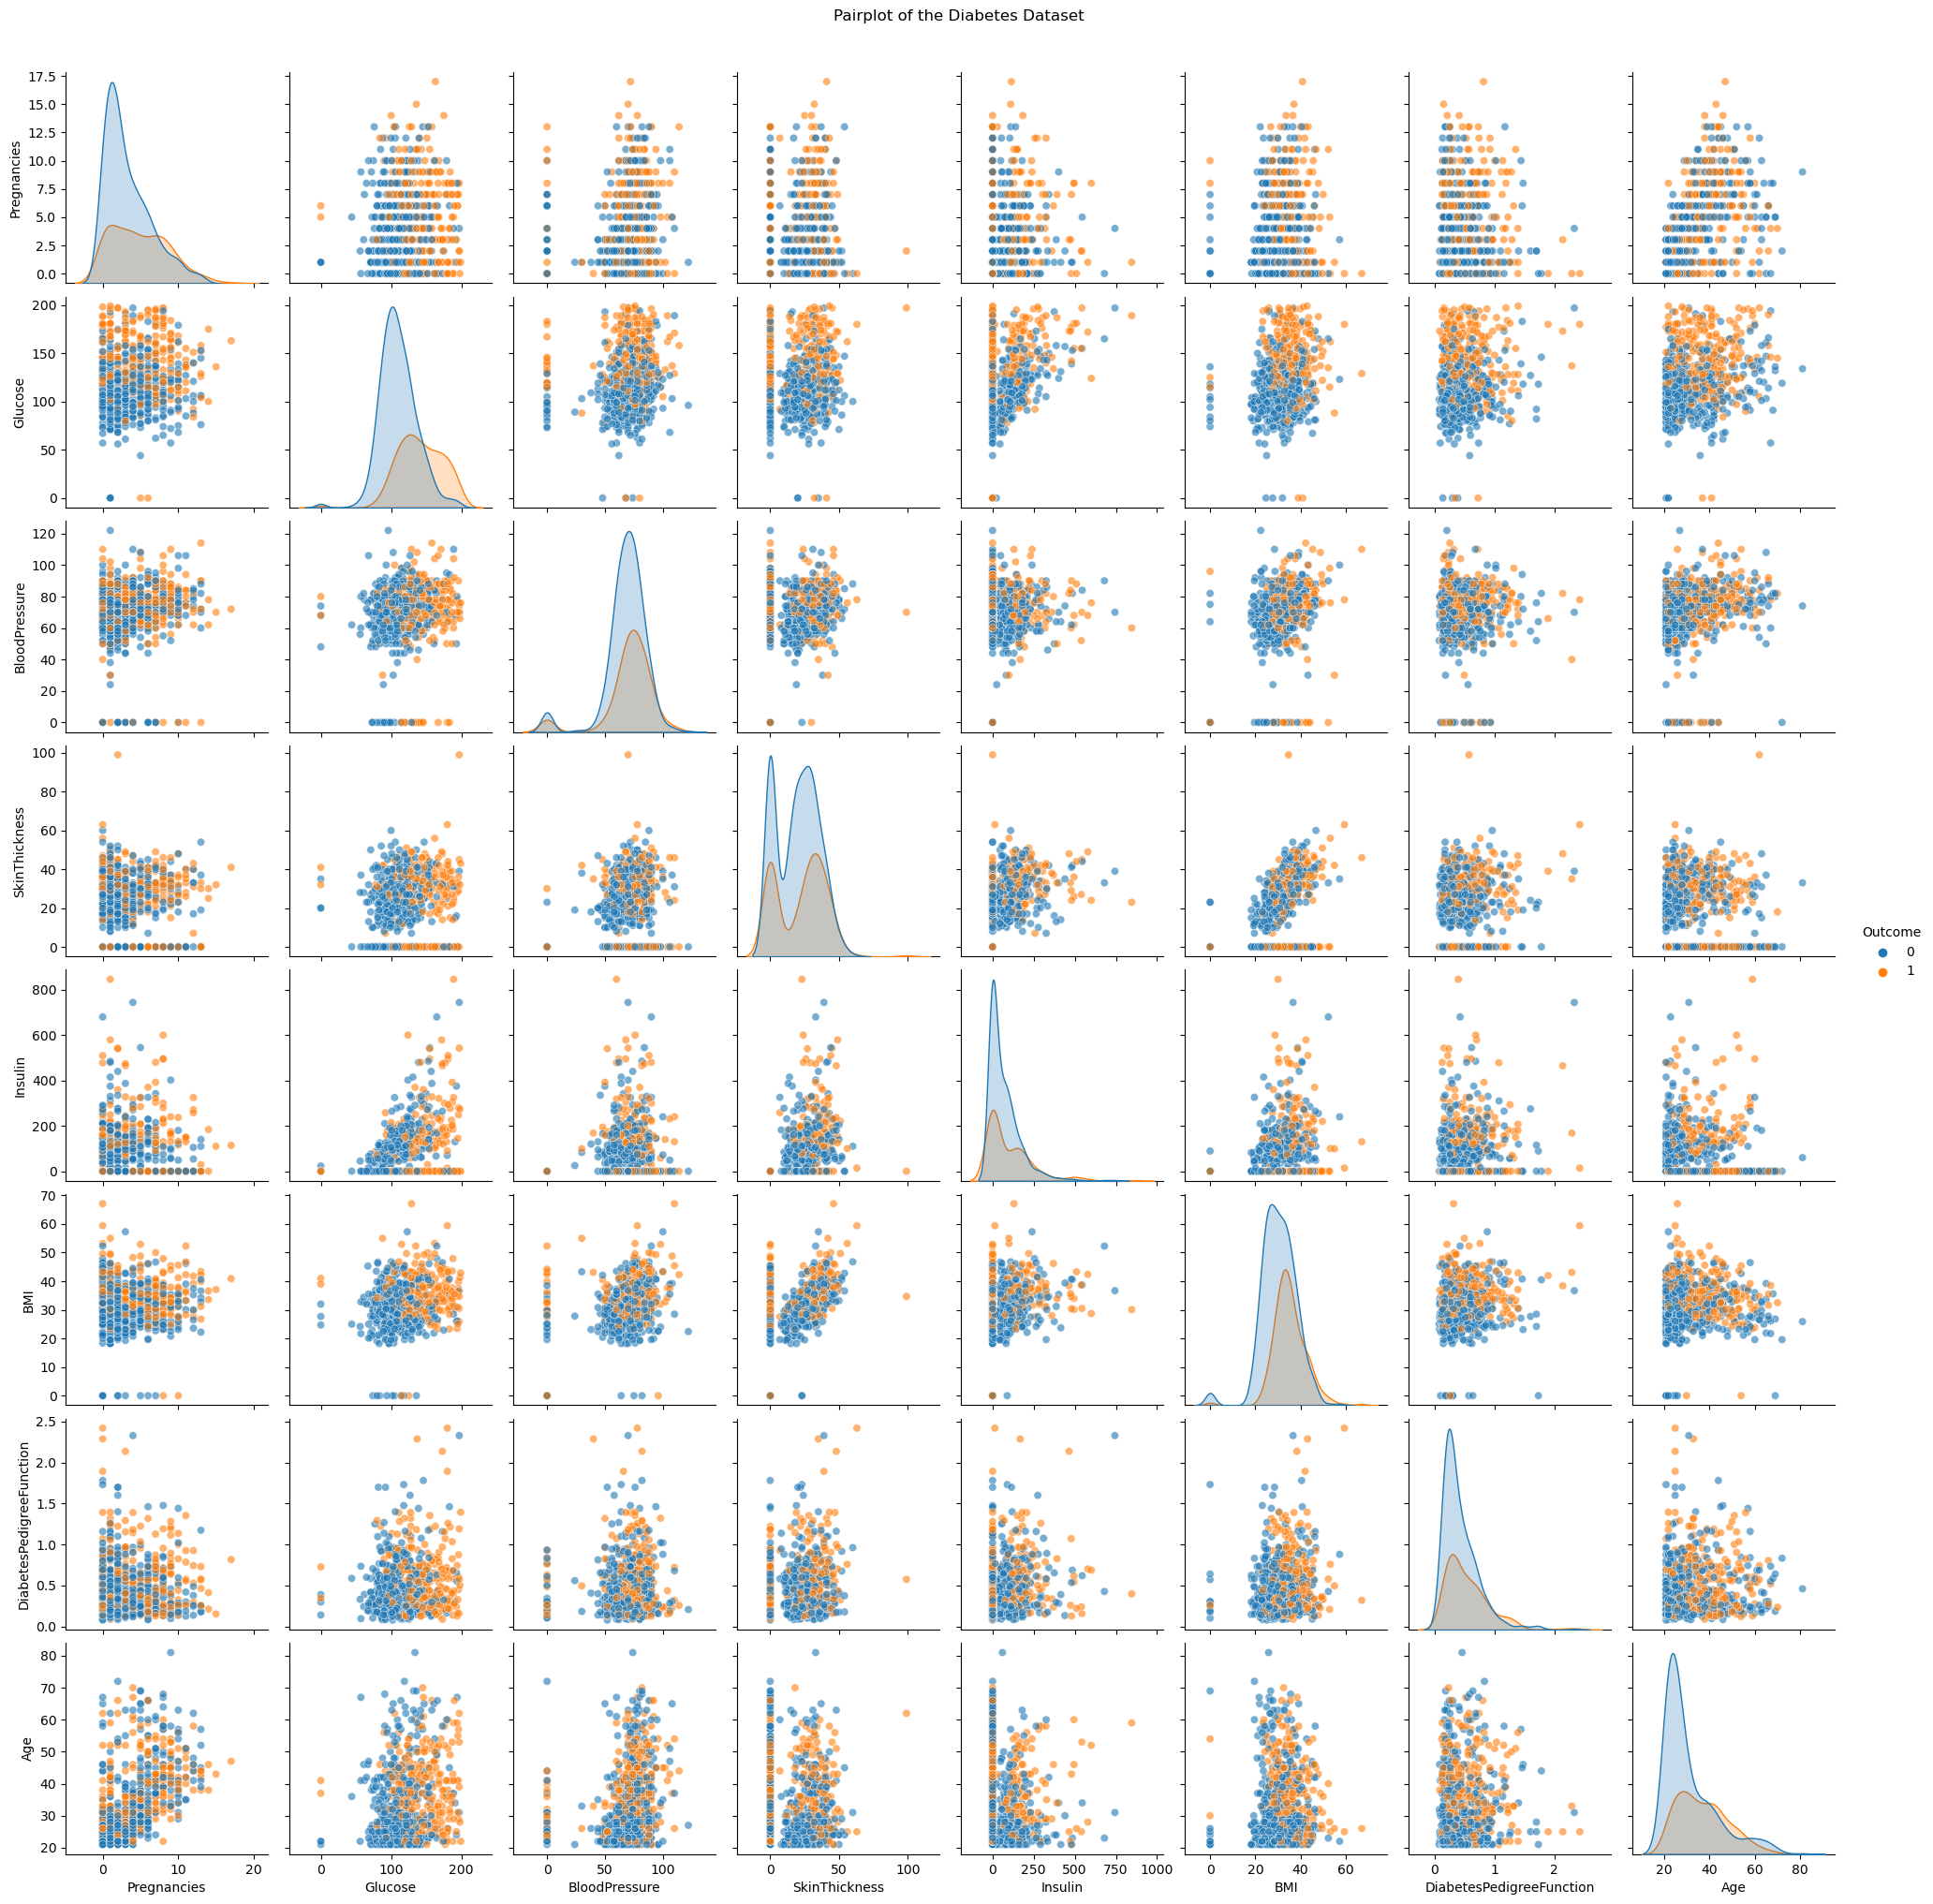

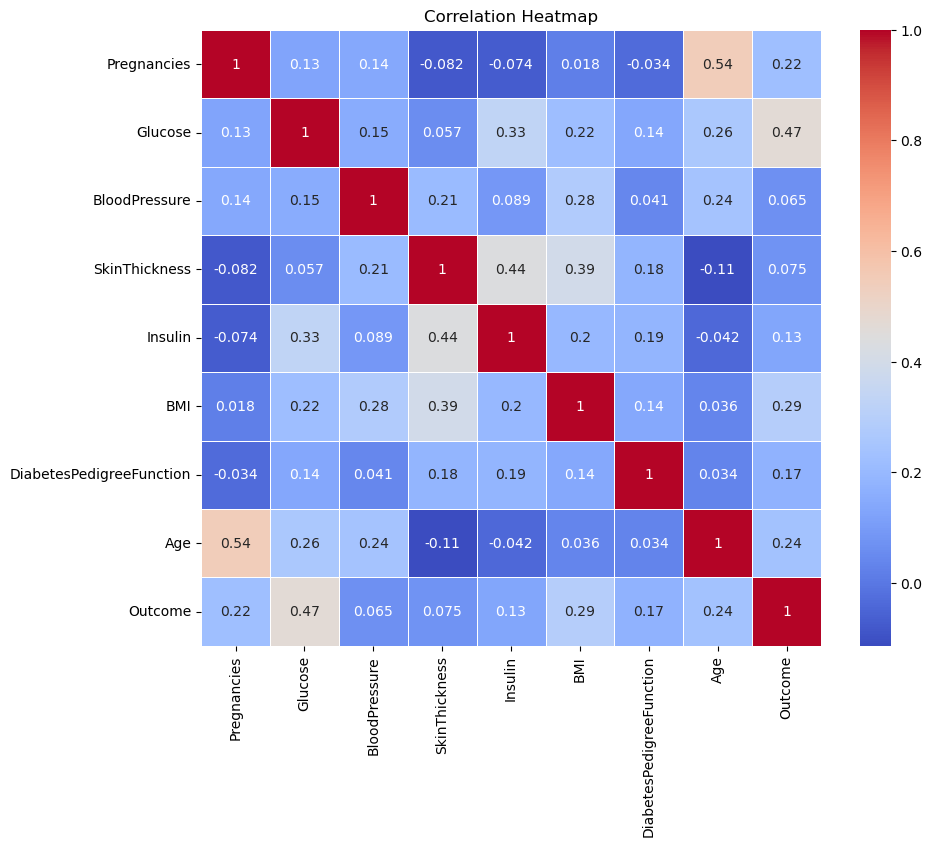

In [49]:
sns.pairplot(diabetes_data, hue='Outcome', diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle("Pairplot of the Diabetes Dataset", y=1.02)
plt.show()

plt.figure(figsize=(10, 8))
corr_matrix = diabetes_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

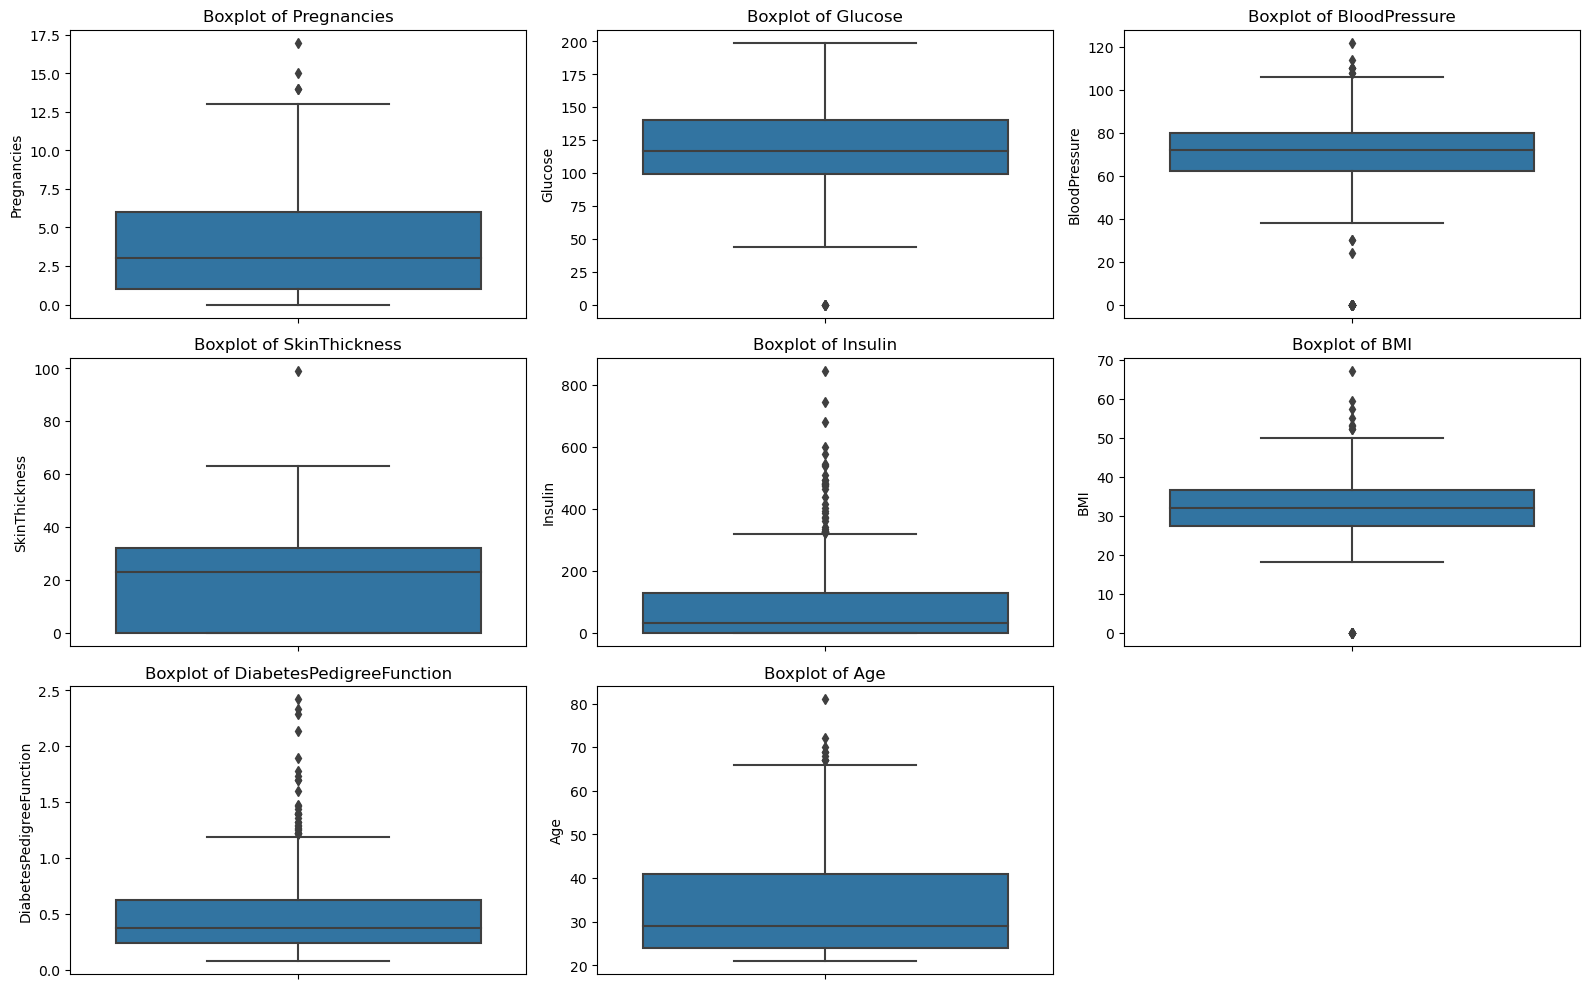

In [50]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(diabetes_data.columns[:-1], 1):  
    plt.subplot(3, 3, i)
    sns.boxplot(y=diabetes_data[column])  
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

In [51]:
columns_with_zero_values = ['Glucose', 'BloodPressure', 'BMI']
diabetes_data[columns_with_zero_values] = diabetes_data[columns_with_zero_values].replace(0, np.nan)
diabetes_data.fillna(diabetes_data.median(), inplace=True)
print(diabetes_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      20.536458   79.799479   
std       3.369578   30.438286      12.096642      15.952218  115.244002   
min       0.000000   44.000000      24.000000       0.000000    0.000000   
25%       1.000000   99.750000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

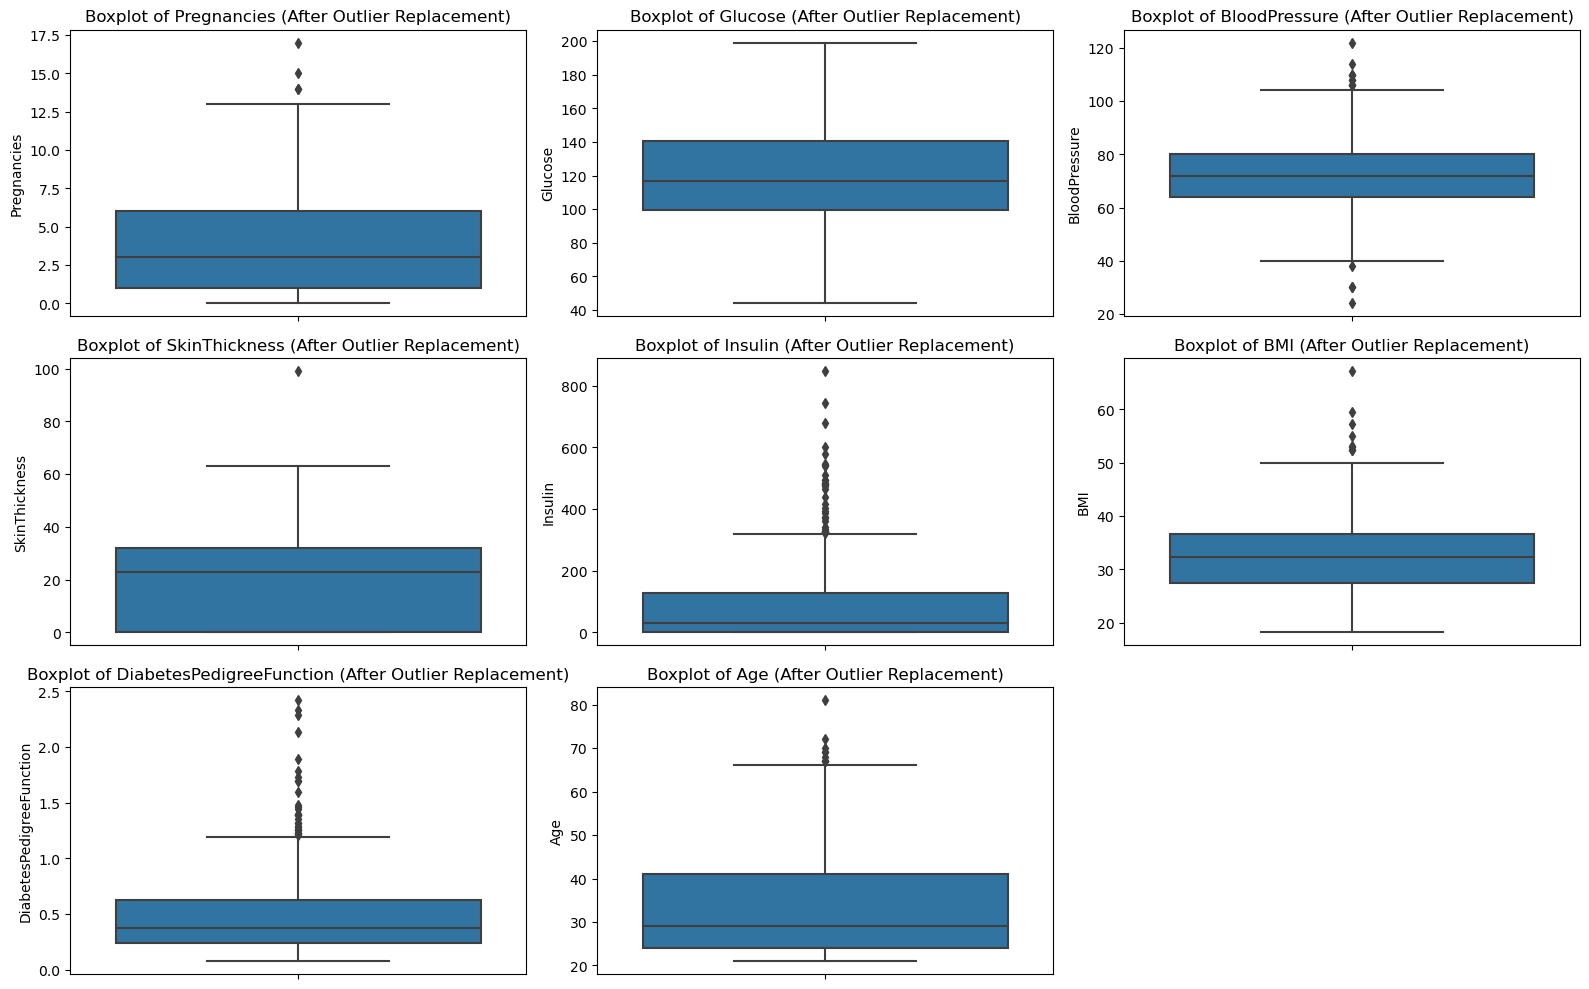

In [52]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(diabetes_data.columns[:-1], 1):  
    plt.subplot(3, 3, i)
    sns.boxplot(y=diabetes_data[column])
    plt.title(f"Boxplot of {column} (After Outlier Replacement)")
plt.tight_layout()
plt.show()

Training and Evluating the perceptron model

In [53]:

X = diabetes_data.drop(columns=['Outcome']) 
y = diabetes_data['Outcome']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

perc_model = Perceptron(max_iter=1000, random_state=42)
perc_model.fit(X_train_scaled, y_train)  

y_pred = perc_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Performance on Test Data:")
print(f"Accuracy: {accuracy:.4f}")  
print(f"Precision: {precision:.4f}")  
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}") 

Model Performance on Test Data:
Accuracy: 0.6688
Precision: 0.5370
Recall: 0.5273
F1 Score: 0.5321


Hyper-parameter tuning for perceptron

In [54]:
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],  
    'alpha': [0.0001, 0.001, 0.01, 0.1],   
    'eta0': [0.001, 0.01, 0.1, 1.0],       
    'max_iter': [1000],                    
    'tol': [1e-3, 1e-4, 1e-5]              
}

grid_search = GridSearchCV(
    Perceptron(random_state=42),
    param_grid,
    cv=5,            
    scoring='accuracy'  
)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)

best_accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
best_conf_matrix = confusion_matrix(y_test, y_pred_best)

print("Best Hyperparameters:")
print(best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")
print(f"Test Accuracy: {best_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Best Hyperparameters:
{'alpha': 0.1, 'eta0': 0.1, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.001}
Best Cross-Validation Accuracy: 0.7443
Test Accuracy: 0.7338
Precision: 0.6061
Recall: 0.7273
F1 Score: 0.6612


Confusion Matrix

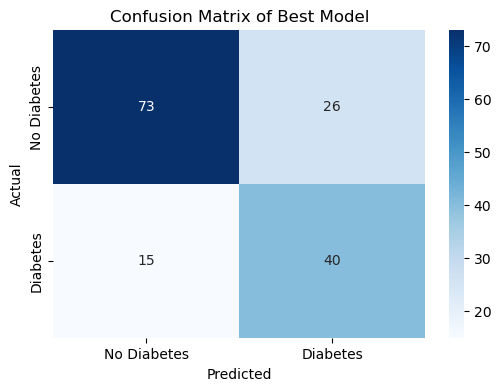

In [55]:
plt.figure(figsize=(6, 4))
sns.heatmap(best_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Best Model')
plt.show()


SVM model training and evualting 

In [56]:
diabetes_data2 = pd.read_csv('diabetes1.csv')

X = diabetes_data2.drop(columns="Outcome")
y = diabetes_data2["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print(f"Accuracy: {accuracy_svm * 100:.2f}%")
print("Classification Report:\n", classification_report_svm)

Accuracy: 78.19%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       301
           1       0.74      0.57      0.65       162

    accuracy                           0.78       463
   macro avg       0.77      0.73      0.75       463
weighted avg       0.78      0.78      0.77       463



Hyper-parameter tuning for SVM model

In [57]:
param_grid = {
    'C': [0.1, 1, 10, 100],             
    'gamma': ['scale', 'auto', 0.01, 0.001],  
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'degree': [2, 3, 4],                 
    'tol': [1e-3, 1e-4]                  
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred_svm_best = best_model.predict(X_test_scaled)

accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
classification_report_svm_best = classification_report(y_test, y_pred_svm_best)

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score * 100:.2f}%")
print(f"Test Set Accuracy: {accuracy_svm_best * 100:.2f}%")
print("Classification Report:\n", classification_report_svm_best)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Hyperparameters: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.001}
Best Cross-Validation Score: 85.62%
Test Set Accuracy: 86.39%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       301
           1       0.82      0.78      0.80       162

    accuracy                           0.86       463
   macro avg       0.85      0.85      0.85       463
weighted avg       0.86      0.86      0.86       463



Confusion matrix

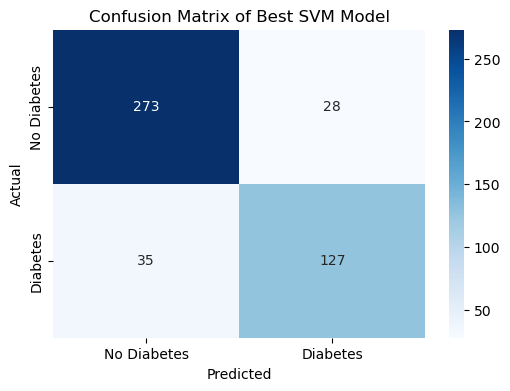

In [58]:
conf_matrix_svm_best = confusion_matrix(y_test, y_pred_svm_best)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Best SVM Model')
plt.show()